## Imports 

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

## Silhouette function

In [3]:
def silhouette(filename):

  data = pd.read_csv(filename)
  range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

  for n_clusters in range_n_clusters:
    plt.figure()

    # The silhouette coefficient can range from -1, 1
    plt.xlim([-1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    plt.ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.15, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.title(("Silhouette analysis for KMeans clustering on Dataset "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

  plt.show()
  return

## Son's Hamburg games in which he scored 

For n_clusters = 2 The average silhouette_score is : 0.768708171211482
For n_clusters = 3 The average silhouette_score is : 0.581339240854455
For n_clusters = 4 The average silhouette_score is : 0.6399198288499244
For n_clusters = 5 The average silhouette_score is : 0.6025815669822737
For n_clusters = 6 The average silhouette_score is : 0.5138789292391268
For n_clusters = 7 The average silhouette_score is : 0.5125428340897985
For n_clusters = 8 The average silhouette_score is : 0.5542093793534739
For n_clusters = 9 The average silhouette_score is : 0.4445324617820301
For n_clusters = 10 The average silhouette_score is : 0.40228412184301626


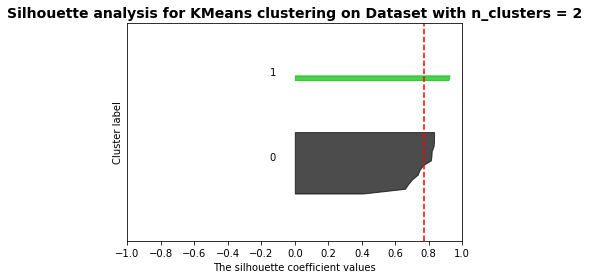

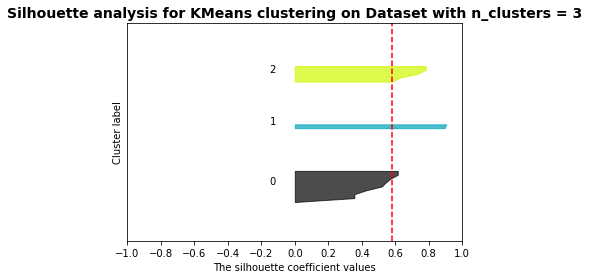

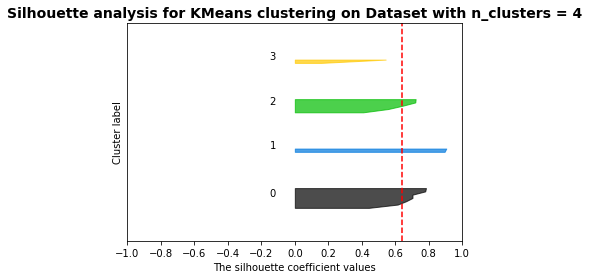

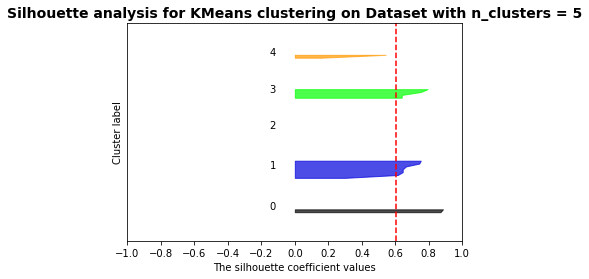

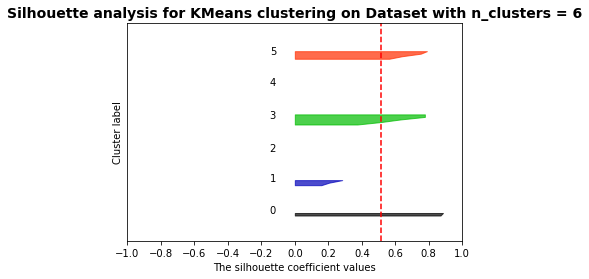

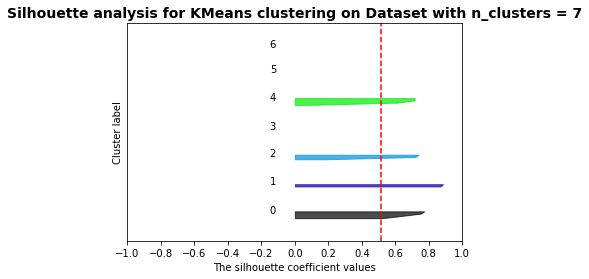

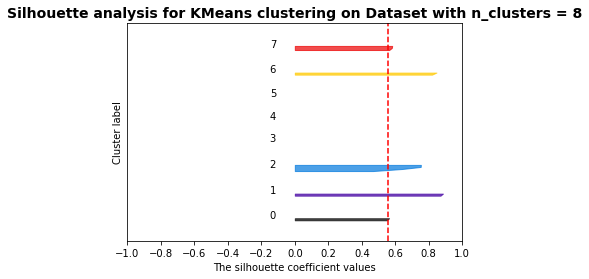

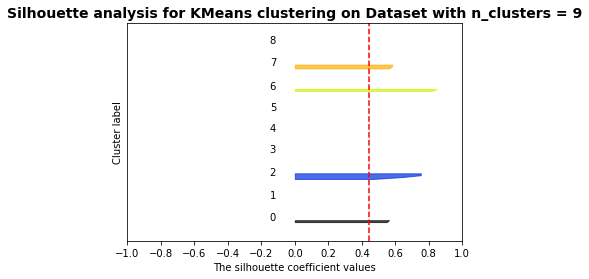

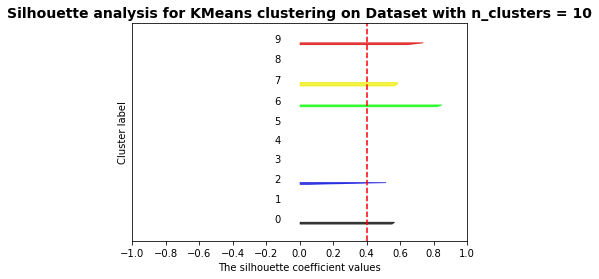

In [7]:
silhouette('Son_hamburg_goals.csv')

## Son's Hamburg games in which he did not score

For n_clusters = 2 The average silhouette_score is : 0.564341540880447
For n_clusters = 3 The average silhouette_score is : 0.5527892599966358
For n_clusters = 4 The average silhouette_score is : 0.574374797403135
For n_clusters = 5 The average silhouette_score is : 0.5851036195671692
For n_clusters = 6 The average silhouette_score is : 0.6022117271291711
For n_clusters = 7 The average silhouette_score is : 0.5923281753816863
For n_clusters = 8 The average silhouette_score is : 0.577466917012513
For n_clusters = 9 The average silhouette_score is : 0.6261868035669567
For n_clusters = 10 The average silhouette_score is : 0.612918438193605


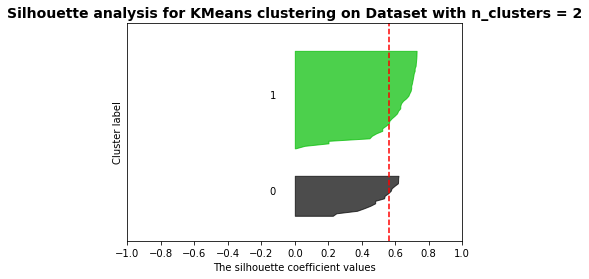

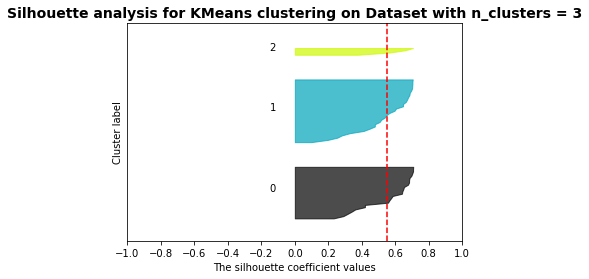

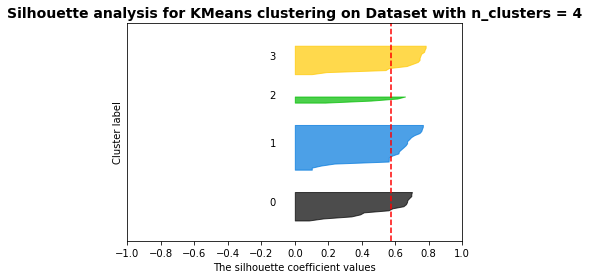

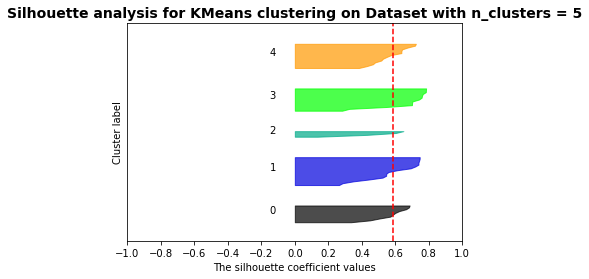

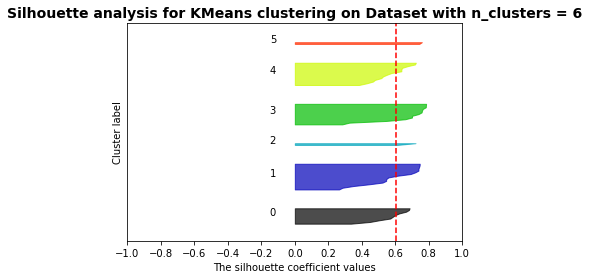

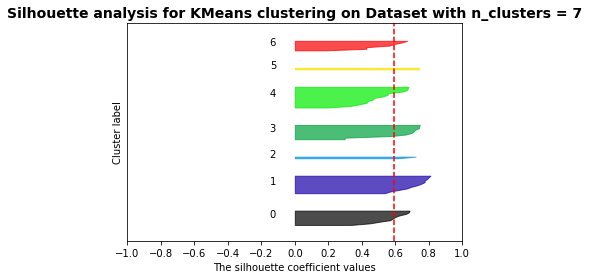

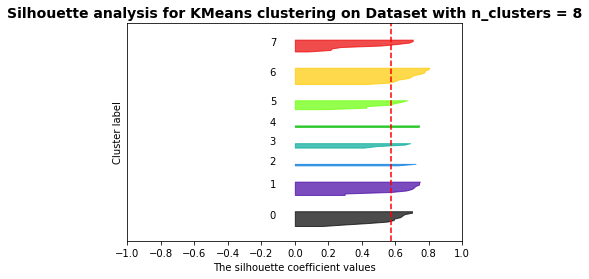

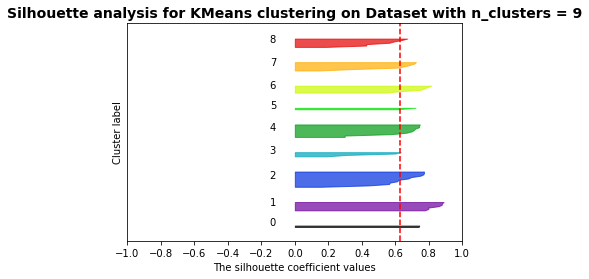

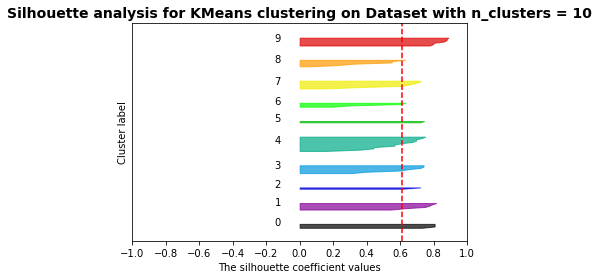

In [8]:
silhouette('Son_hamburg_no_goals.csv')

## Son's Leverkusen games in which he scored 

For n_clusters = 2 The average silhouette_score is : 0.5302568585760625
For n_clusters = 3 The average silhouette_score is : 0.5551986464788149
For n_clusters = 4 The average silhouette_score is : 0.5834266955692157
For n_clusters = 5 The average silhouette_score is : 0.5407644036353602
For n_clusters = 6 The average silhouette_score is : 0.5261889753210909
For n_clusters = 7 The average silhouette_score is : 0.5631395079018648
For n_clusters = 8 The average silhouette_score is : 0.6018674067915708
For n_clusters = 9 The average silhouette_score is : 0.5644523786208175
For n_clusters = 10 The average silhouette_score is : 0.5223621367304281


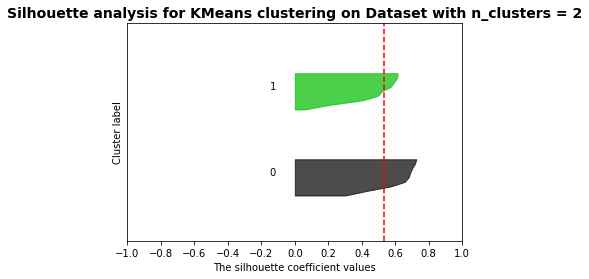

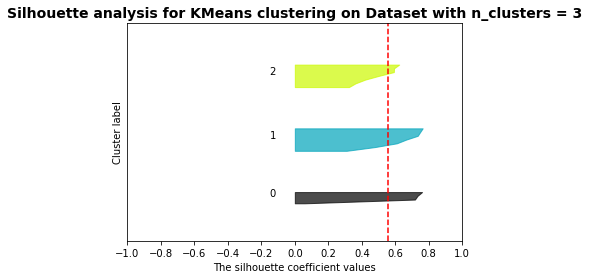

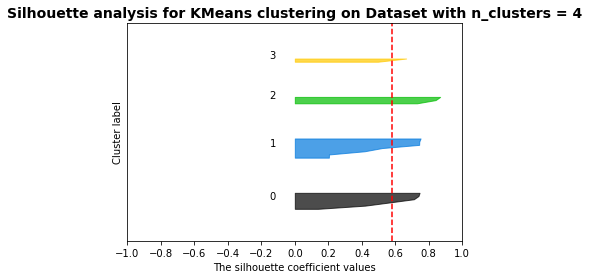

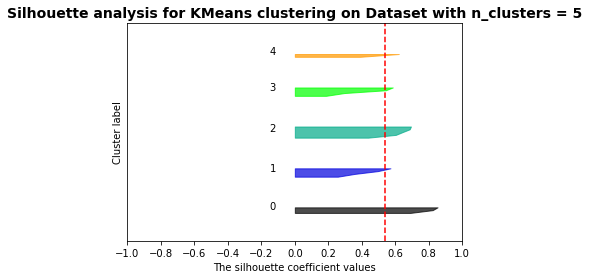

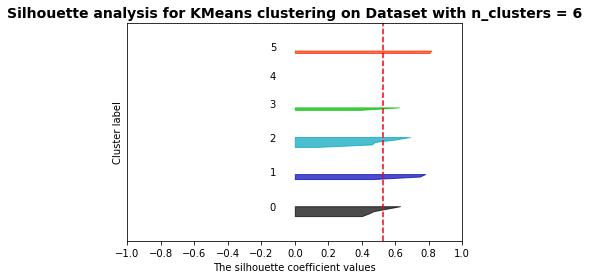

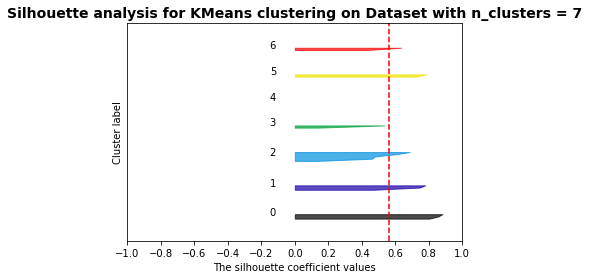

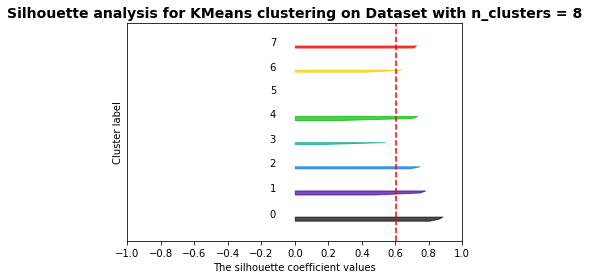

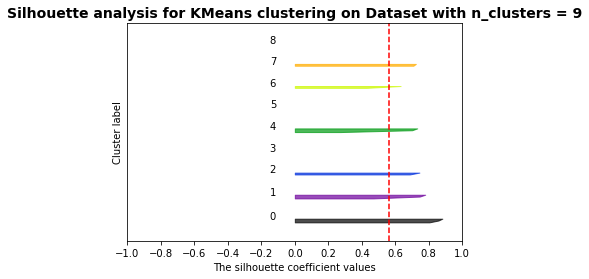

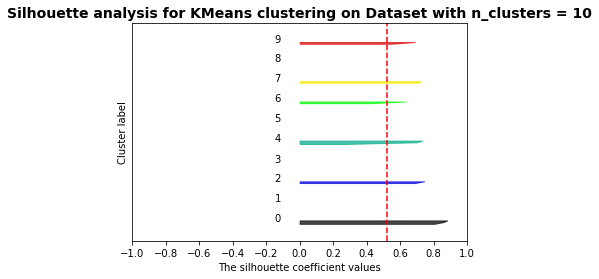

In [10]:
silhouette('Son_leverkusen_goals.csv')

## Son's Leverkusen games in which he did not score

For n_clusters = 2 The average silhouette_score is : 0.6846261506740522
For n_clusters = 3 The average silhouette_score is : 0.5619737478978668
For n_clusters = 4 The average silhouette_score is : 0.5540748649382008
For n_clusters = 5 The average silhouette_score is : 0.5557564828205446
For n_clusters = 6 The average silhouette_score is : 0.5555502559657488
For n_clusters = 7 The average silhouette_score is : 0.5893874150883737
For n_clusters = 8 The average silhouette_score is : 0.584664794931269
For n_clusters = 9 The average silhouette_score is : 0.5918071128038012
For n_clusters = 10 The average silhouette_score is : 0.5798574880716674


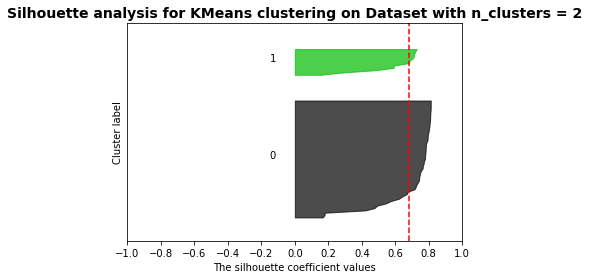

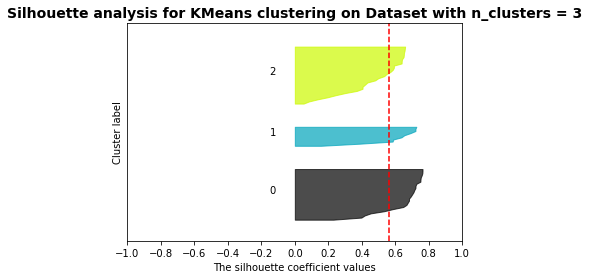

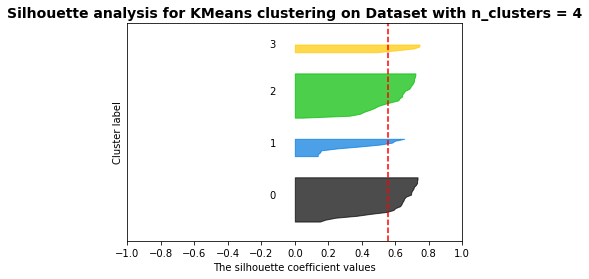

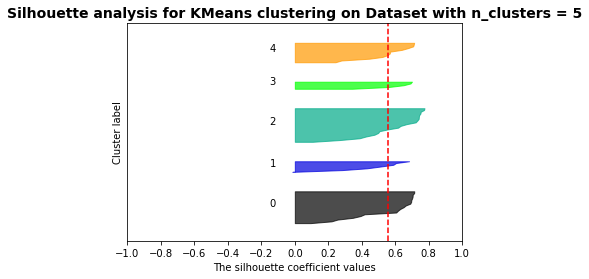

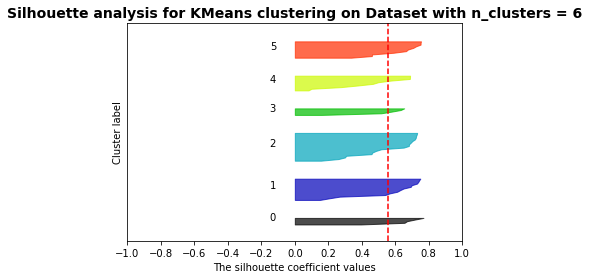

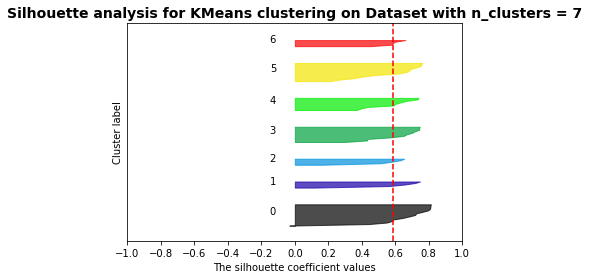

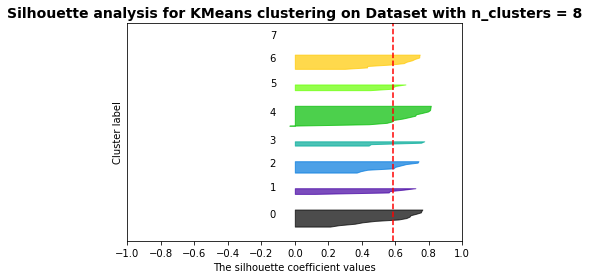

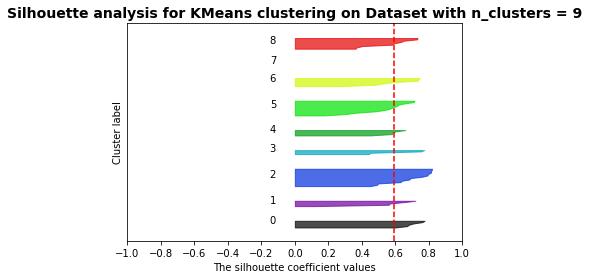

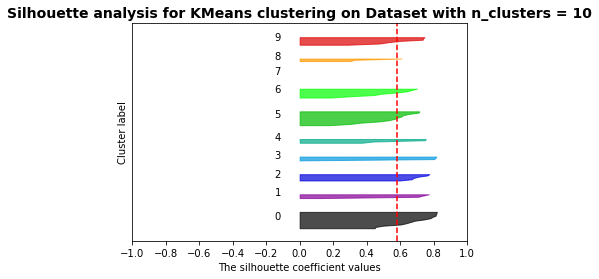

In [11]:
silhouette('Son_leverkusen_no_goals.csv')

## Son's Spurs games in which he scored 

For n_clusters = 2 The average silhouette_score is : 0.6191376362806177
For n_clusters = 3 The average silhouette_score is : 0.6017606649387297
For n_clusters = 4 The average silhouette_score is : 0.5201346837401384
For n_clusters = 5 The average silhouette_score is : 0.5718081153098881
For n_clusters = 6 The average silhouette_score is : 0.586516419322466
For n_clusters = 7 The average silhouette_score is : 0.6186249851623308
For n_clusters = 8 The average silhouette_score is : 0.599469333687519
For n_clusters = 9 The average silhouette_score is : 0.5957561853261218
For n_clusters = 10 The average silhouette_score is : 0.5975338842621585


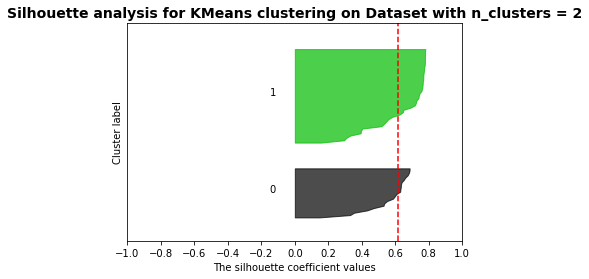

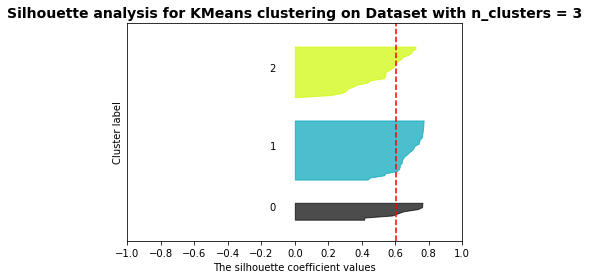

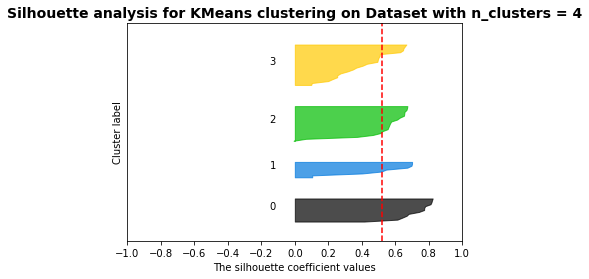

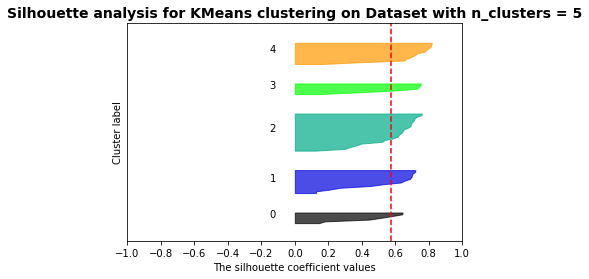

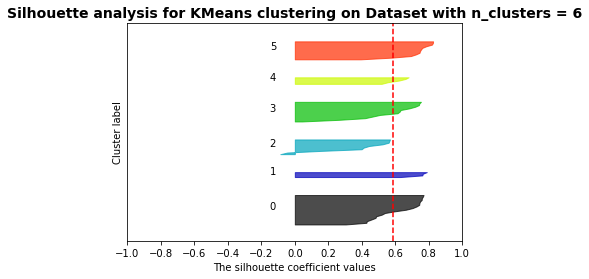

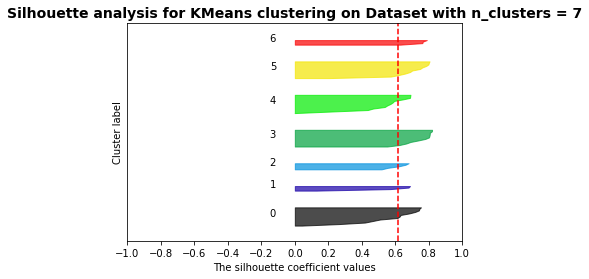

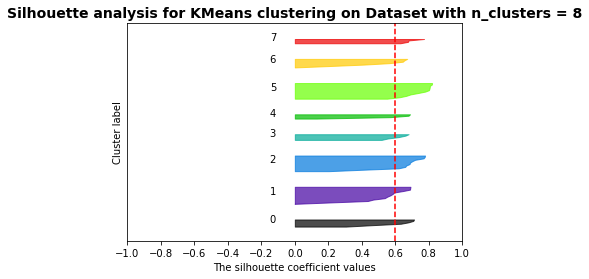

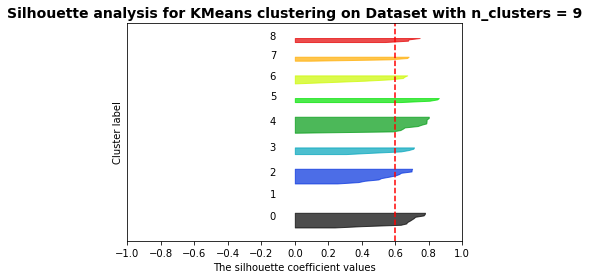

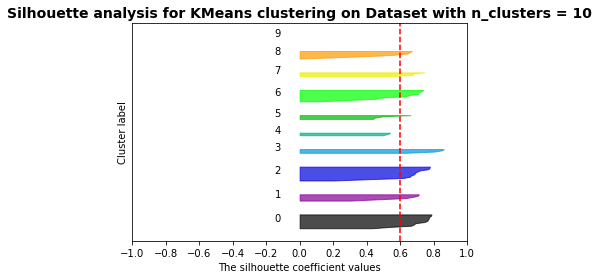

In [12]:
silhouette('Son_spurs_goals.csv')

## Son's Spurs games in which he did not score 

For n_clusters = 2 The average silhouette_score is : 0.6040297604773047
For n_clusters = 3 The average silhouette_score is : 0.5552380092773642
For n_clusters = 4 The average silhouette_score is : 0.5671491862136078
For n_clusters = 5 The average silhouette_score is : 0.5351146264024753
For n_clusters = 6 The average silhouette_score is : 0.5454331142208728
For n_clusters = 7 The average silhouette_score is : 0.5445051536449482
For n_clusters = 8 The average silhouette_score is : 0.5546696666671922
For n_clusters = 9 The average silhouette_score is : 0.5585624736628607
For n_clusters = 10 The average silhouette_score is : 0.5638925616823633


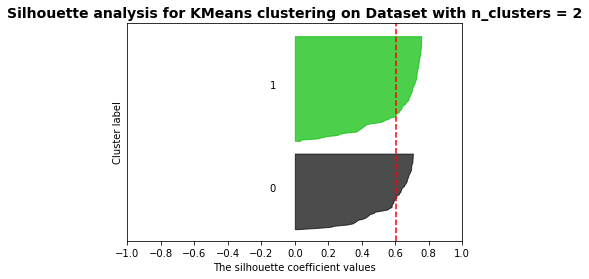

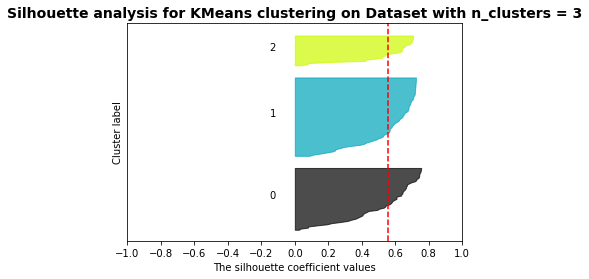

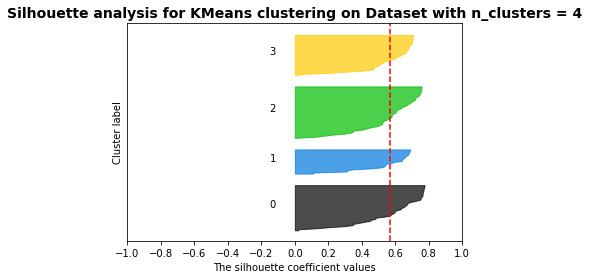

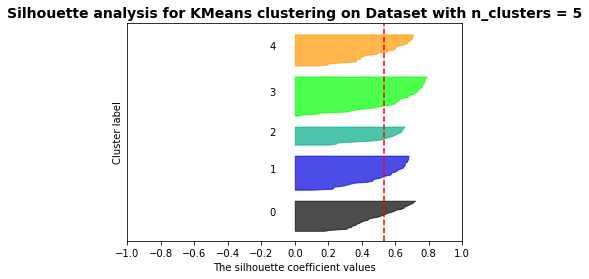

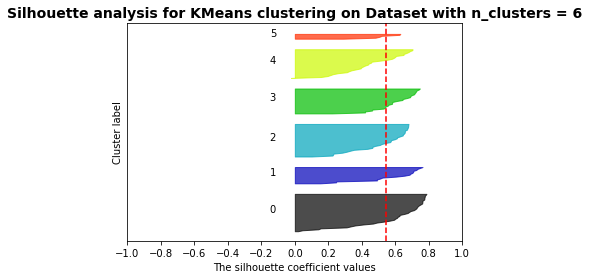

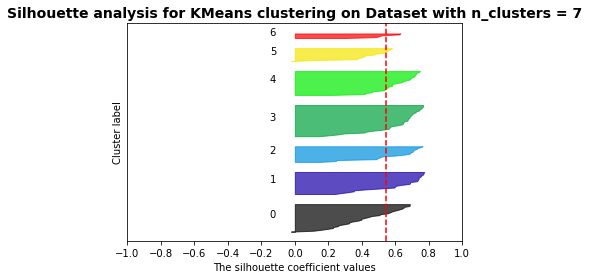

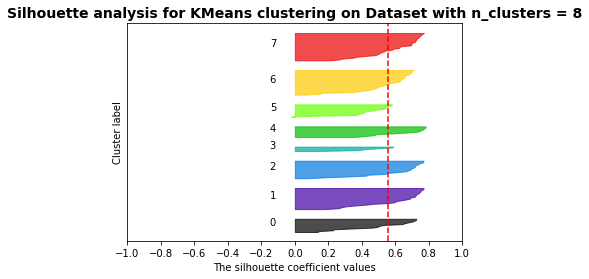

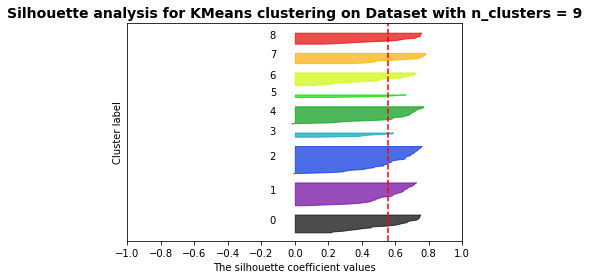

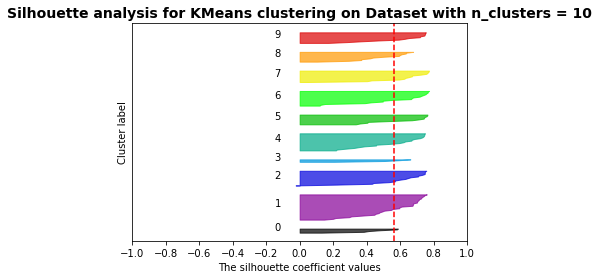

In [13]:
silhouette('Son_spurs_no_goals.csv')